In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18
from scipy.spatial.distance import cosine

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
model = resnet18(weights="ResNet18_Weights.DEFAULT")
model = torch.nn.Sequential(*list(model.children())[:-1])
model.eval()
model = model.to(device)
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

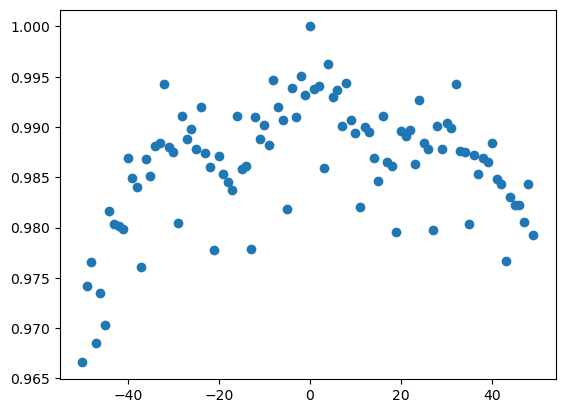

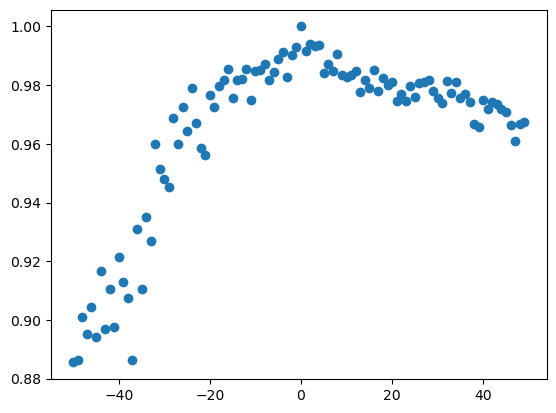

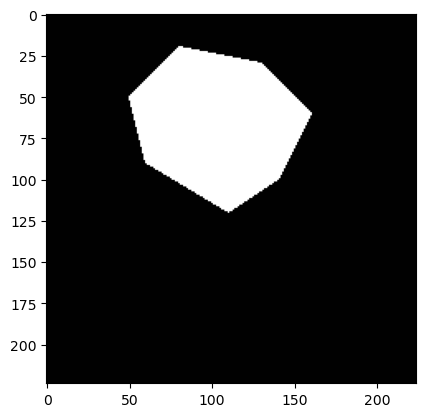

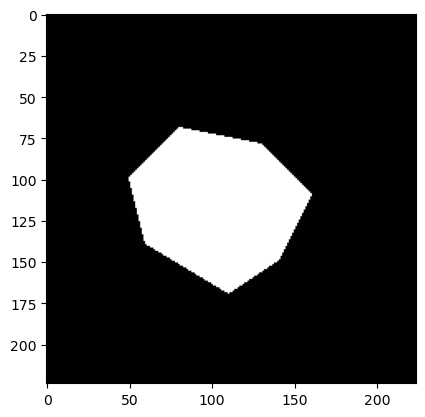

In [8]:
def mask_img(img, poly):
    mask = np.ones(img.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [poly], 255)
    cropped_image = cv2.bitwise_or(img, np.stack([mask]*3, axis=-1))
    return cropped_image




image = np.zeros((224, 224, 3), dtype=np.uint8) * 255
polygon1 = np.array([[50, 50], [80, 20], [130, 30], [160, 60], [140, 100], [110, 120], [60, 90]])
op1 = mask_img(image, polygon1)
embed1 = model(transform(Image.fromarray(op1)).unsqueeze(0).to(device)).squeeze().detach().cpu().numpy()

cosine_sims = []
for i in range(-50, 50):
    polygon2 = polygon1 + np.array([i, 0])
    op2 = mask_img(image, polygon2)

    embed2 = model(transform(Image.fromarray(op2)).unsqueeze(0).to(device)).squeeze().detach().cpu().numpy()

    cosine_sims.append(1 - cosine(embed1, embed2))

plt.scatter(range(-50, 50), cosine_sims)
# plt.ylim(0, 1)
plt.show()

cosine_sims = []
for i in range(-50, 50):
    polygon2 = polygon1 + np.array([0, i])
    op2 = mask_img(image, polygon2)

    embed2 = model(transform(Image.fromarray(op2)).unsqueeze(0).to(device)).squeeze().detach().cpu().numpy()

    cosine_sims.append(1 - cosine(embed1, embed2))

plt.scatter(range(-50, 50), cosine_sims)
# plt.ylim(0, 1)
plt.show()

plt.imshow(op1)
plt.show()
plt.imshow(mask_img(image, polygon2))

In [7]:
image = cv2.imread("/home/nagababa/Downloads/temppp/nature.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
polygon1 = np.array([[50, 50], [80, 20], [130, 30], [160, 60], [140, 100], [110, 120], [60, 90]])
op1 = mask_img(image, polygon1)
embed1 = model(transform(Image.fromarray(op1)).unsqueeze(0).to(device)).squeeze().detach().cpu().numpy()

cosine_sims = []
for i in range(-50, 50):
    polygon2 = polygon1 + np.array([i, 0])
    op2 = mask_img(image, polygon2)

    embed2 = model(transform(Image.fromarray(op2)).unsqueeze(0).to(device)).squeeze().detach().cpu().numpy()

    cosine_sims.append(1 - cosine(embed1, embed2))

plt.scatter(range(-50, 50), cosine_sims)
plt.show()

cosine_sims = []
for i in range(-50, 50):
    polygon2 = polygon1 + np.array([0, i])
    op2 = mask_img(image, polygon2)

    embed2 = model(transform(Image.fromarray(op2)).unsqueeze(0).to(device)).squeeze().detach().cpu().numpy()

    cosine_sims.append(1 - cosine(embed1, embed2))

plt.scatter(range(-50, 50), cosine_sims)
plt.show()

plt.imshow(op1)
plt.show()
plt.imshow(mask_img(image, polygon2))

[ WARN:0@66.487] global loadsave.cpp:248 findDecoder imread_('/home/nagababa/Downloads/temppp/nature.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
